In [136]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt, dates
import datetime
from sklearn import linear_model

sb.set_context("poster")
plt.style.use('ggplot')
%matplotlib inline

In [157]:
def get_stock(stock_ticker):
    stock = yf.Ticker(stock_ticker)
    #periods = “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
    stock_dic = {}
    stock_dic['ticker'] = stock_ticker
    #stock_dic['1d'] = stock.history(period='1d', interval='1m', actions=False)
    stock_dic['5d'] = stock.history(period='5d', interval='1d', actions=False)
    stock_dic['1mo'] = stock.history(period='1mo', interval='1d', actions=False)
    stock_dic['6mo'] = stock.history(period='6mo', interval='1d', actions=False)
    
    return stock_dic

In [153]:
def get_linear_fit(df):
    df_copy = df.copy()
    #days from start does not work with 1d since it is by the minute
    df_copy['days_from_start'] = (df_copy.index - df_copy.index[0]).days
    x = df_copy.loc[:, 'days_from_start'].T
    y = df_copy.loc[:, 'Close']
    polyfit_close = np.polyfit(x, y, 1)
    function = np.poly1d(polyfit_close) 
    df_copy['linear_fit'] = function(df_copy.loc[:, 'days_from_start'])
    return df_copy

In [158]:
stock_dic = get_stock('amzn')

In [159]:
for i, key in enumerate(stock_dic.keys()):
    if i > 0:
        stock_dic[key] = get_linear_fit(stock_dic[key])

In [161]:
stock_dic['ticker']

'amzn'

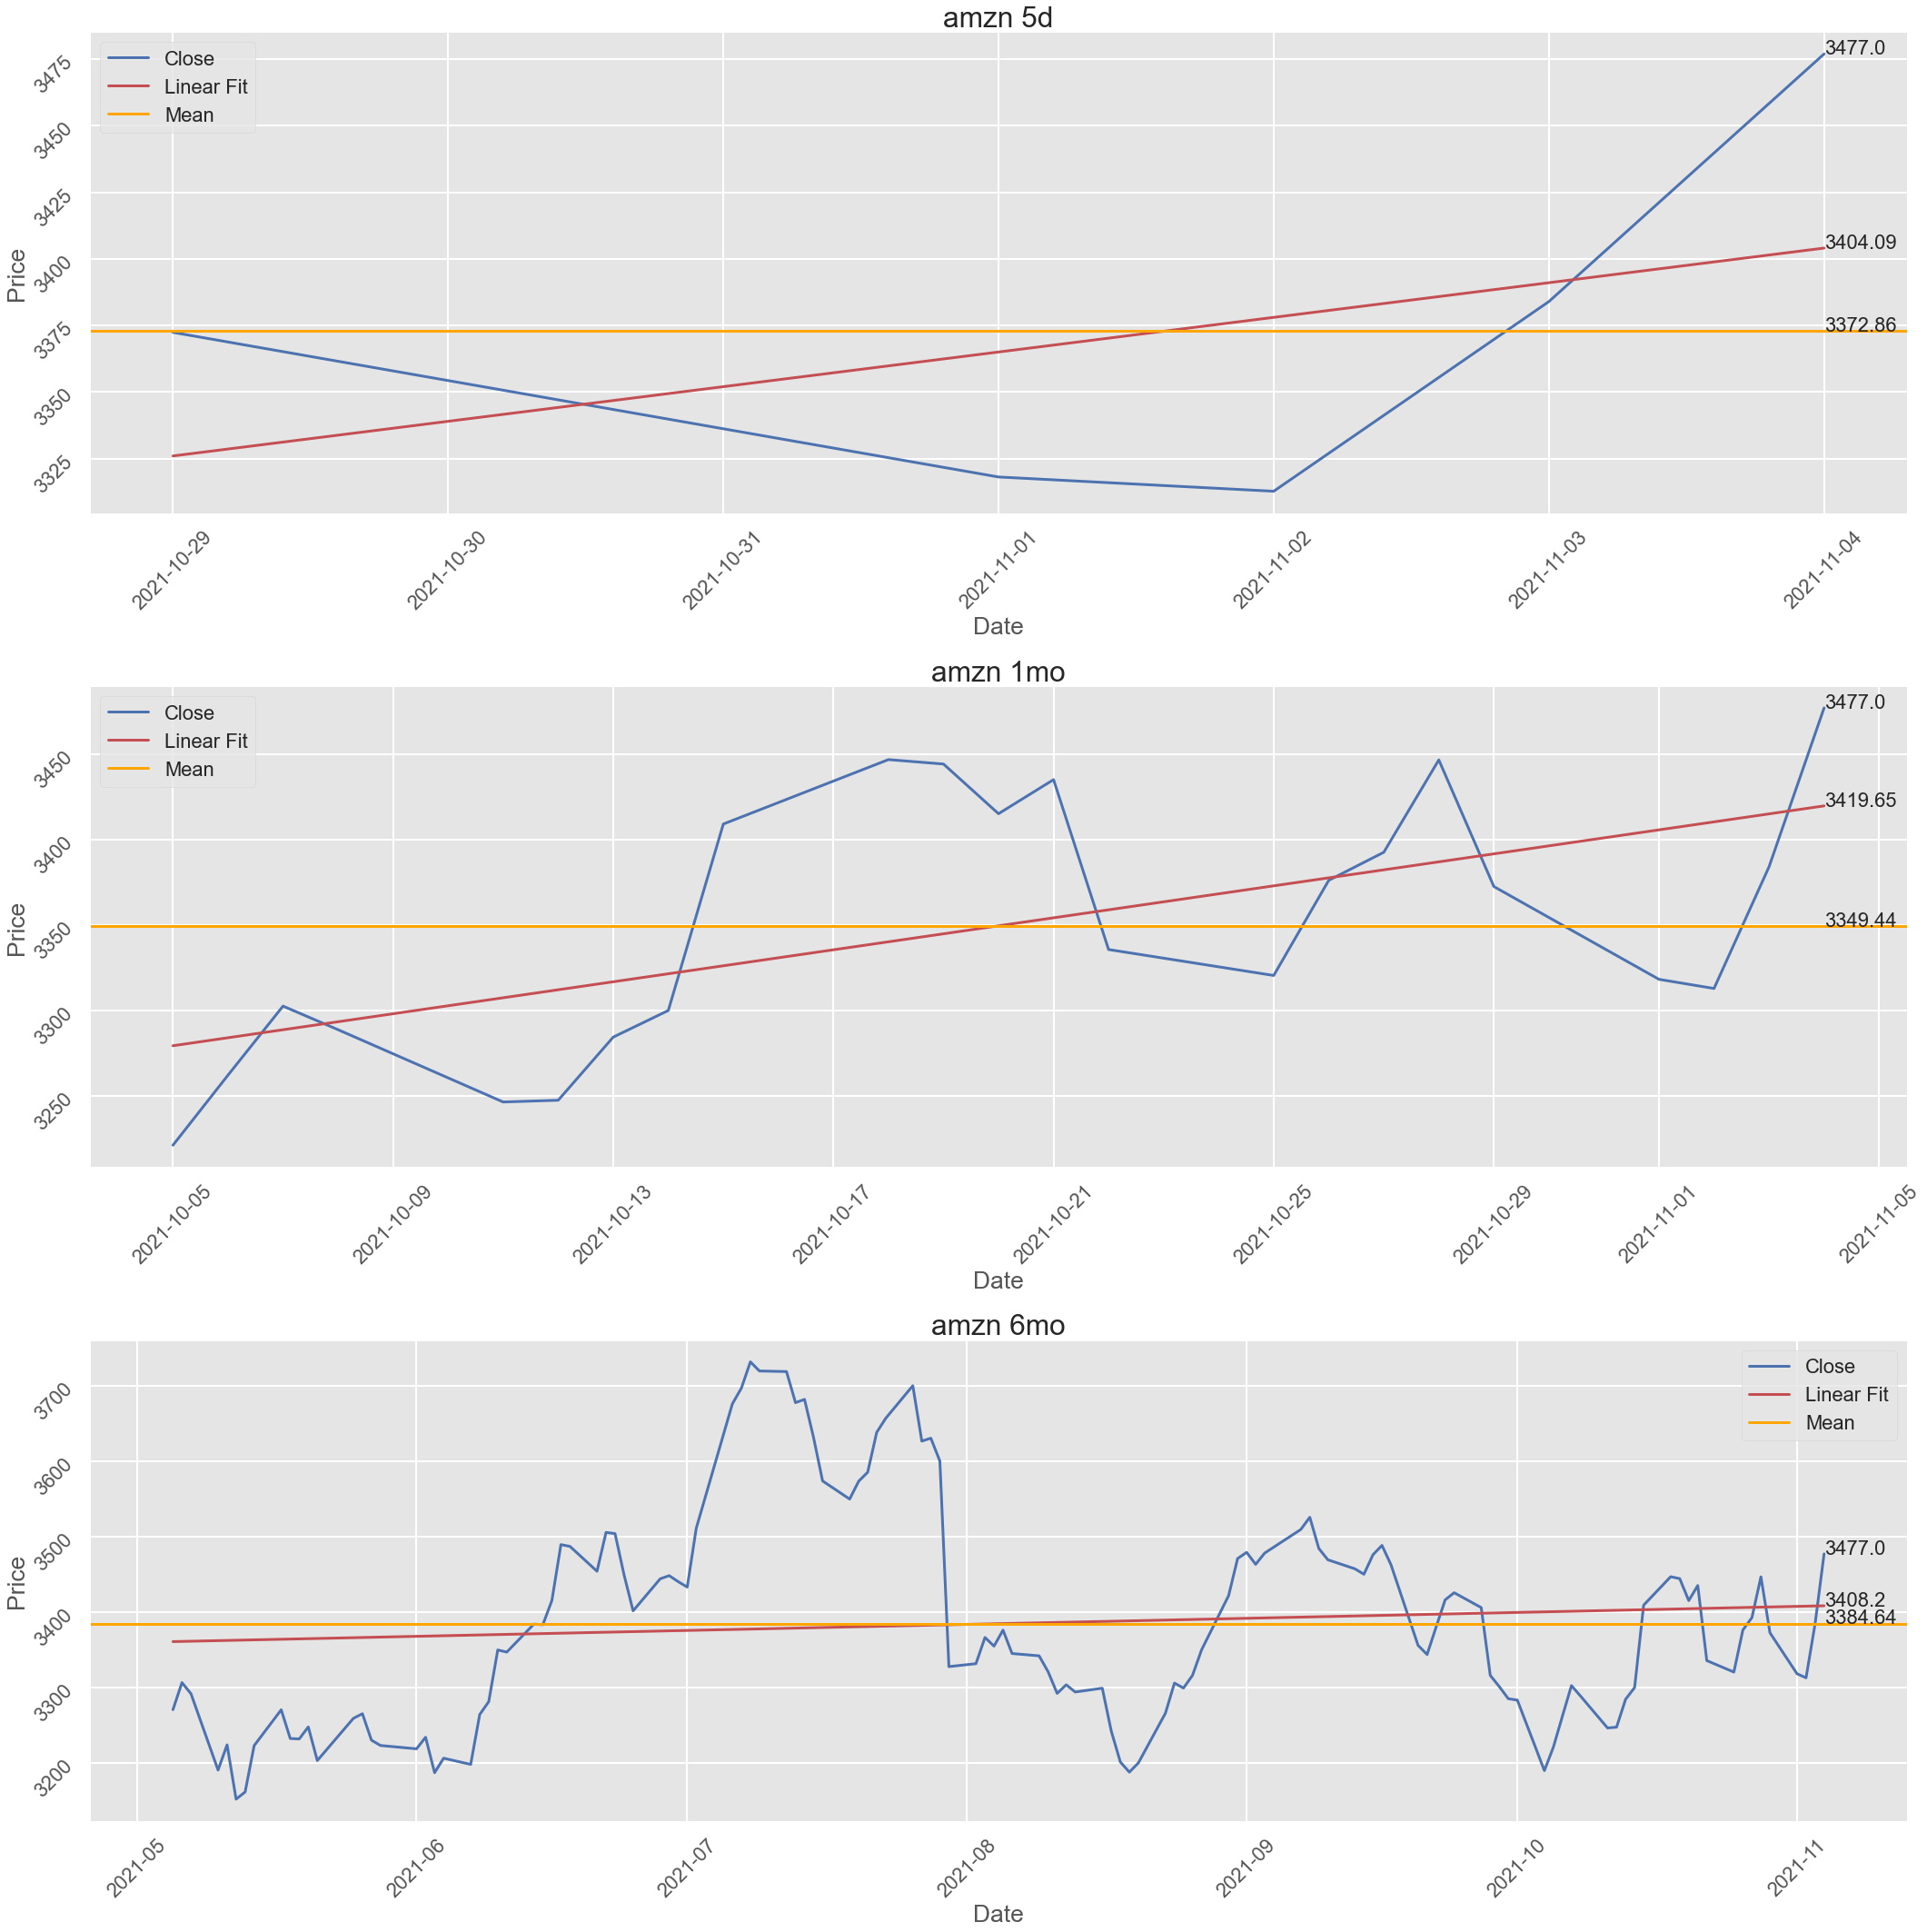

In [165]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(3, figsize=(30, 30))

for j, key in enumerate(stock_dic.keys()):
    if j > 0:
        i = j - 1
        ax[i].set_title(f'{stock_dic["ticker"]} {key}')
        ax[i].plot(stock_dic[key].loc[:, 'Close'], color='b', label='Close')
        ax[i].plot(stock_dic[key].loc[:, 'linear_fit'], color='r', label='Linear Fit')
        ax[i].axhline(stock_dic[key].loc[:, 'Close'].mean(), color='orange', label='Mean')

        ax[i].annotate(round(stock_dic[key].loc[:, 'Close'].iloc[-1], 2), (stock_dic[key].index[-1], stock_dic[key].loc[:, 'Close'].iloc[-1]))
        ax[i].annotate(round(stock_dic[key].loc[:, 'linear_fit'].iloc[-1], 2), (stock_dic[key].index[-1], stock_dic[key].loc[:, 'linear_fit'].iloc[-1]))
        ax[i].annotate(round(stock_dic[key].loc[:, 'Close'].mean(), 2), (stock_dic[key].index[-1], stock_dic[key].loc[:, 'Close'].mean()))

        ax[i].legend()

        ax[i].set_xlabel('Date')
        ax[i].set_ylabel('Price')
        ax[i].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

In [92]:
amzn_df['days_from_start'] = (amzn_df.index - amzn_df.index[0]).days

In [94]:
x = amzn_df.loc[:, 'days_from_start'].T
y = amzn_df.loc[:, 'Close']

In [90]:
polyfit_close = np.polyfit(x, y, 1)
function = np.poly1d(polyfit_close) 
amzn_df['linear_fit'] = function(amzn_df.loc[:, 'days_from_start'])

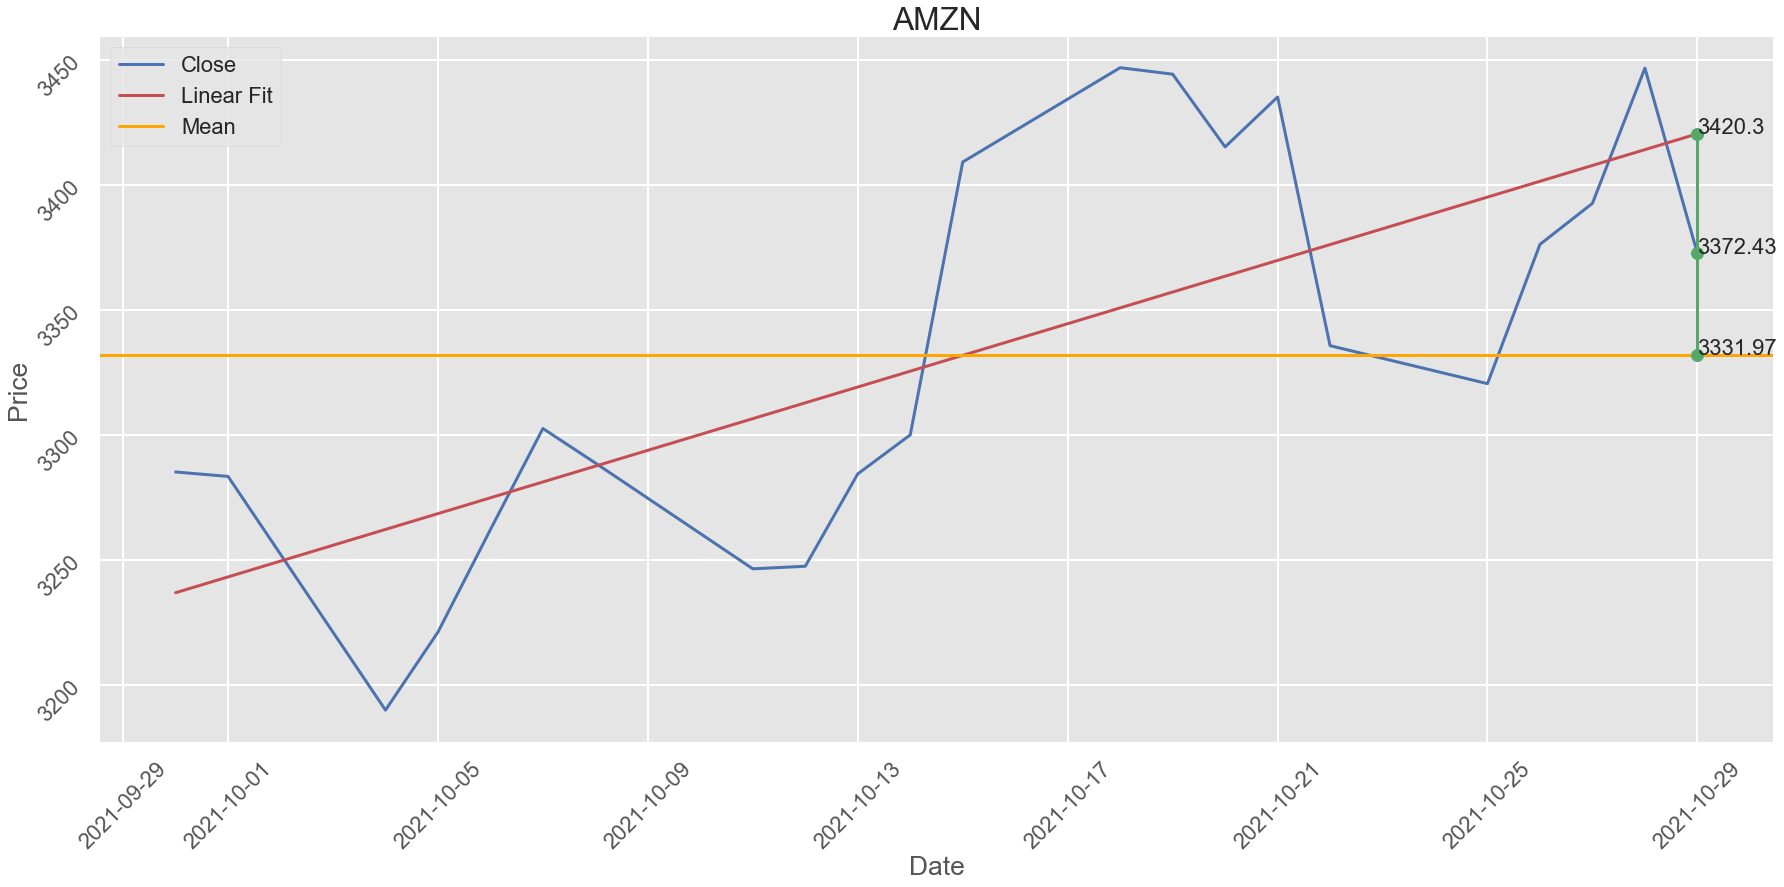

In [131]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(30, 13))
ax.set_title("AMZN")
ax.plot(amzn_df.loc[:, 'Close'], color='b', label='Close')
ax.plot(amzn_df.loc[:, 'linear_fit'], color='r', label='Linear Fit')
ax.axhline(amzn_df.loc[:, 'Close'].mean(), color='orange', label='Mean')

ax.annotate(round(amzn_df.loc[:, 'Close'].iloc[-1], 2), (amzn_df.index[-1], amzn_df.loc[:, 'Close'].iloc[-1]))
ax.annotate(round(amzn_df.loc[:, 'linear_fit'].iloc[-1], 2), (amzn_df.index[-1], amzn_df.loc[:, 'linear_fit'].iloc[-1]))
ax.annotate(round(amzn_df.loc[:, 'Close'].mean(), 2), (amzn_df.index[-1], amzn_df.loc[:, 'Close'].mean()))

ax.legend()

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.tick_params(labelrotation=45)

plt.show()